In [10]:
# libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to C:\Users\Soham Kishor
[nltk_data]     Walam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load data

In [4]:
# Load data
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

Preprocessing

In [5]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['message'].apply(preprocess)

Feature Extraction

In [6]:
# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].map({'ham': 0, 'spam': 1})

Train test split and train classifier

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Metrics

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Print metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Spam', 'spam']))

Confusion Matrix:
 [[966   0]
 [ 33 116]]

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Visualization of cm

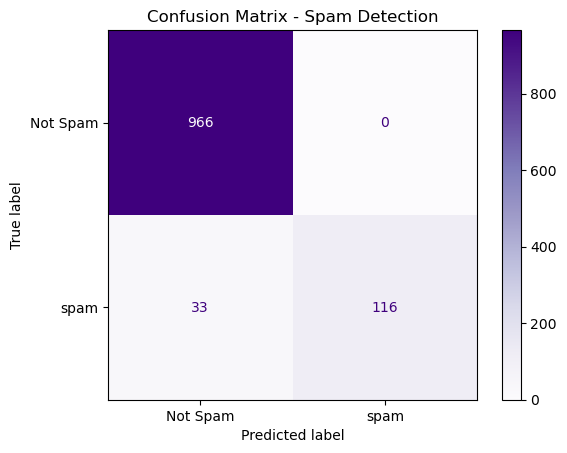

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=['Not Spam', 'spam'])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Spam Detection")
plt.show()